<a href="https://colab.research.google.com/github/drash-anchan/Quant_and_algo/blob/main/Quant-Analyst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install yfinance

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = yf.download(
    ["NVDA", "KO", "SPY"],
    start="2024-01-01",
    end="2025-01-01",
    auto_adjust=True
)["Close"]

print(data.head())

[*********************100%***********************]  3 of 3 completed

Ticker             KO       NVDA         SPY
Date                                        
2024-01-02  56.383644  48.141174  461.247437
2024-01-03  56.515602  47.542515  457.480591
2024-01-04  56.327095  47.971275  456.006989
2024-01-05  56.242260  49.069660  456.631622
2024-01-08  56.656986  52.223907  463.150452


In [8]:
returns = data.pct_change().dropna()
returns.head()

Ticker,KO,NVDA,SPY
Date,,,
2024-01-03,0.002340,-0.012435,-0.008167
2024-01-04,-0.003335,0.009018,-0.003221
2024-01-05,-0.001506,0.022897,0.001370
2024-01-08,0.007374,0.064281,0.014276
2024-01-09,-0.001830,0.016975,-0.001517


In [9]:
volatility = returns.std()
print("Daily Volatility:\n", volatility)

Daily Volatility:
 Ticker
KO      0.008021
NVDA    0.033079
SPY     0.007923
dtype: float64


In [10]:
correlation = returns.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
 Ticker        KO      NVDA       SPY
Ticker                              
KO      1.000000 -0.271003  0.056291
NVDA   -0.271003  1.000000  0.635330
SPY     0.056291  0.635330  1.000000


In [11]:
risk_free_rate = 0.04

mean_return = returns.mean()

sharpe_ratio = (mean_return * 252 - risk_free_rate) / (volatility * np.sqrt(252))

print("Sharpe Ratio:\n", sharpe_ratio)

Sharpe Ratio:
 Ticker
KO      0.301755
NVDA    2.147539
SPY     1.564372
dtype: float64


In [12]:
wealth_index = (1 + returns).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks) / previous_peaks
max_drawdown = drawdown.min()

print("Maximum Drawdown:\n", max_drawdown)

Maximum Drawdown:
 Ticker
KO     -0.148565
NVDA   -0.270468
SPY    -0.084056
dtype: float64


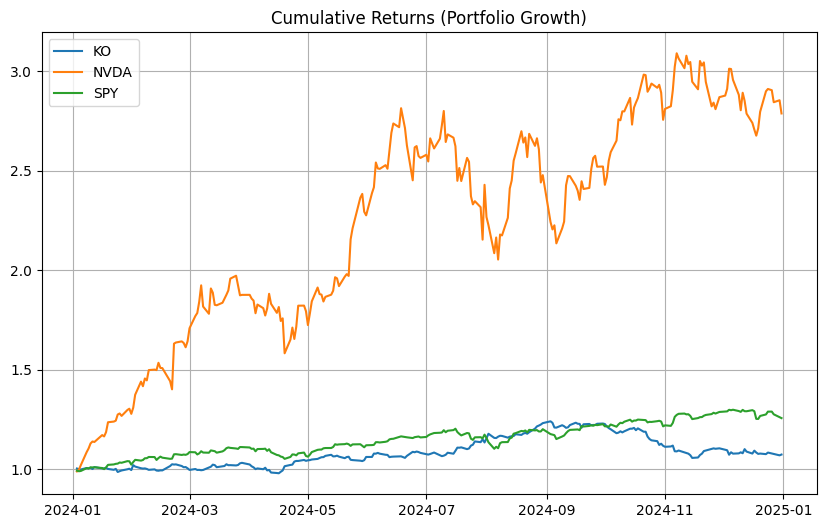

In [13]:
plt.figure(figsize=(10,6))
plt.plot(wealth_index)
plt.title("Cumulative Returns (Portfolio Growth)")
plt.legend(wealth_index.columns)
plt.grid(True)
plt.show()

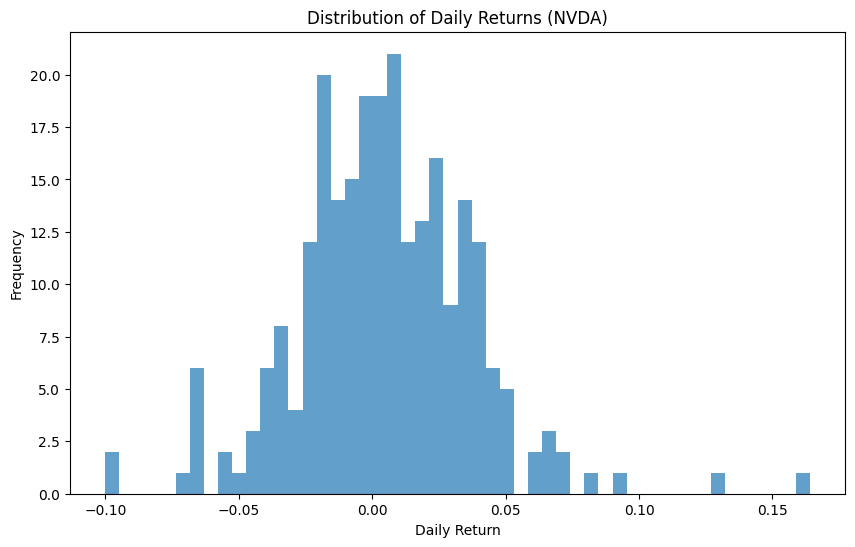

In [14]:
plt.figure(figsize=(10,6))
plt.hist(returns["NVDA"], bins=50, alpha=0.7)
plt.title("Distribution of Daily Returns (NVDA)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

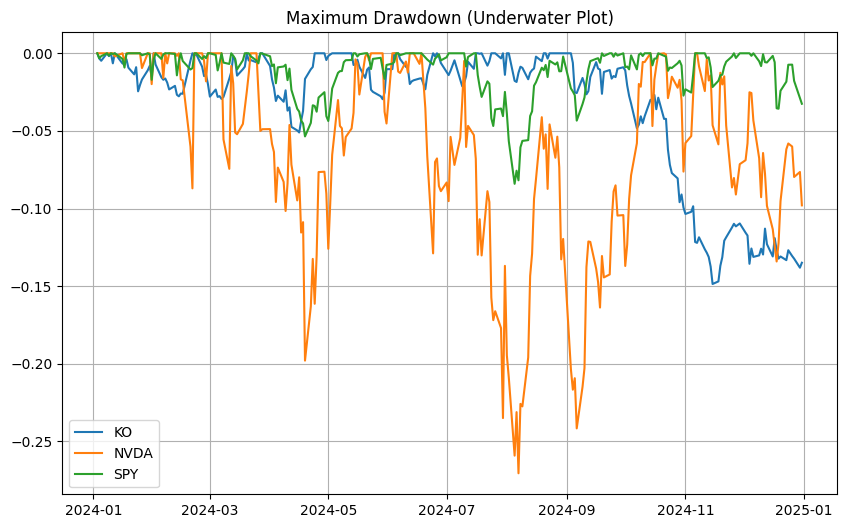

In [15]:
plt.figure(figsize=(10,6))
plt.plot(drawdown)
plt.title("Maximum Drawdown (Underwater Plot)")
plt.legend(drawdown.columns)
plt.grid(True)
plt.show()